### 图像梯度：
I是图像像素的值(如：RGB值)  
一阶导数：  
x的梯度：Gx = I(x+1,y)-I(x,y)  
y的梯度：Gy = I(x,y+1)-I(x,y)  
二阶导数：  
x的梯度：I(x+1,y)+I(x-1,y)-2I(x,y)
y的梯度：I(x,y+1)+I(x,y-1)-2I(x,y)
OpenCV 提供了三种不同的梯度滤波器，或者说高通滤波器： Sobel，Scharr 和 Laplacian。Sobel， Scharr 其实就是求一阶或二阶导数。 Scharr 是对 Sobel的优化。Laplacian 是求二阶导数。  
梯度大小和方向的公式为：  
<center>$G=\sqrt{(G_x^2+G_y^2 )}$</center>
<center>$\theta=tan^{-1}(\frac{G_x}{G_y})$</center>
梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。
<center><img src="image/gradient.png" alt="FAO" width="200"></center>

### Sobel算子和Scharr算子：
Sobel 算子是高斯平滑与微分操作的结合体，所以它的抗噪声能力很好。你可以设定求导的方向（xorder 或 yorder）。还可以设定使用的卷积核的大小（ksize）。
<center><img src="image/Sobel.png" alt="FAO" width="300"></center>

如果 ksize=-1，会使用 3x3 的 Scharr 滤波器，它的的效果要比 3x3 的 Sobel 滤波器好（而且速度相同，所以在使用 3x3 滤波器时应该尽量使用 Scharr 滤波器）。 3x3 的 Scharr 滤波器卷积核如下：

<center><img src="image/Scharr.png" alt="FAO" width="300"></center>

### Laplacian算子：
拉普拉斯算子使用的卷积核：  
<center><img src="image/Laplacian.png" alt="FAO" width="150"></center>

In [1]:
from imutils import *

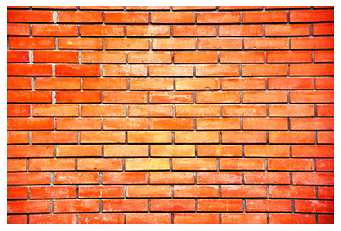

In [2]:
image = imread('image/bricks.png')
show(image)

In [3]:
def gradient(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # cv2.CV_64F输出图像的深度(数据类型)，64位float类型，因为梯度可能是正也可能是负
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    # 1, 0表示在x方向求一阶导数，最大可以求2阶导数
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    # 0, 1表示在y方向求一阶导数，最大可以求2阶导数
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    titles = ['Original', 'Laplacian', 'SobelX', 'SobelY']
    images = [image,laplacian,sobelx,sobely]
    plt.figure(figsize=(10,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

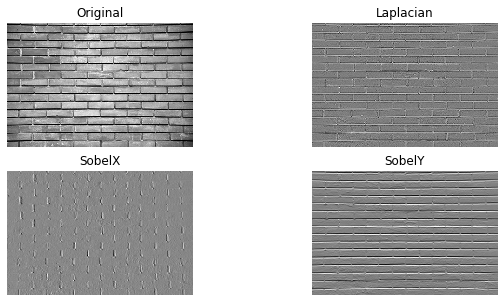

In [4]:
gradient(image)

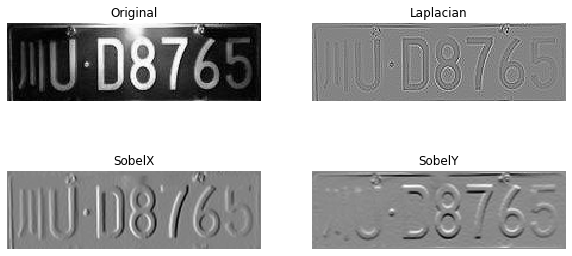

In [5]:
image = imread('image/license_plate.png')
gradient(image)